## Importing data and checking data

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [2]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
print('Dates between: ' + min(df['created_at'])[0:10] + ' and ' + max(df['created_at'])[0:10] )  

Dates between: 2017-03-01 and 2017-03-30


### Incorrectly calculated metric (a)

In [25]:
AOV=df['order_amount'].sum() / len(df)

print('The metric calculated incorrectly was defined as the total order values divided by the dataframe number of rows.\
        So the average order value (AOV) was calculated equals to ${0:.2f}'.format(AOV))

The metric calculated incorrectly was defined as the total order values divided by the dataframe number of rows.        So the average order value (AOV) was calculated equals to $3145.13


#### A the metric defined above is a bad metric because there are some outliers that do the average order value be bigger than that should be in reality. The presence of outliers can be see in the chart below.

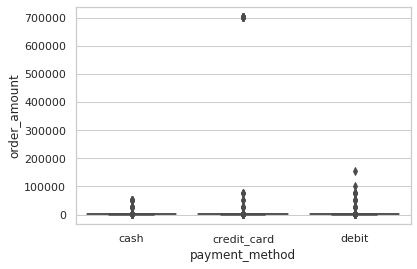

In [5]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["payment_method"], y=df["order_amount"])

#### An alternative metric to the proposed is to sum all orders amount and divide by the number of items in the order. In this way, we are calculating the average price of sneakers selling by Shopify's partners. (b)

### What metric would you report for this dataset (b)? What is its value (c)?


In [32]:
avgPrice = df['order_amount'].sum() / df['total_items'].sum()

print('The metric that should be reported for this dataset is  is to sum all orders amount and divide by\
 the number of items in the order. The correct values is equals to  ${0:.2f}'.format(avgPrice))

The metric that should be reported for this dataset is  is to sum all orders amount and divide by the number of items in the order. The correct values is equals to  $357.92


#### Another kind of analysis is to calculate the average price paid by each customer. So, it is possible check who are the customers that have the highest average prices.

In [10]:
a=df.groupby("user_id", as_index=False)[["total_items", "order_amount"]].sum()
a['avg_order'] = a['order_amount']/ a['total_items']
a.sort_values(['avg_order'], ascending=False).head()

,user_id,total_items,order_amount,avg_order
179,878,24,156936,6539.000000
67,766,23,80076,3481.565217
263,962,24,80408,3350.333333
156,855,27,80915,2996.851852
76,775,28,81114,2896.928571


#### The last analysis could be extended to calculate who are the partner shops that have the highest average prices in the sales.

In [8]:
b=df.groupby("shop_id", as_index=False)[["order_amount", "total_items"]].sum()
b['avg_order'] = b['order_amount'] / b['total_items']
b.sort_values(['avg_order'], ascending=False).head()

,shop_id,order_amount,total_items,avg_order
77,78,2263800,88,25725.0
41,42,11990176,34063,352.0
11,12,18693,93,201.0
88,89,23128,118,196.0
98,99,18330,94,195.0
